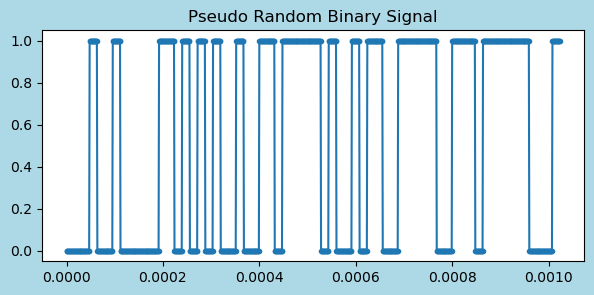

In [1]:
import numpy as np
import matplotlib.pyplot as plt

samplerate = 2 ** 10
N = 2* samplerate

timestep =  1e-6
tcol = np.linspace(0.0, timestep * samplerate, samplerate, endpoint=False)

a1_range = [0, 1] # amplitude range
a1 = np.random.rand(samplerate) * (a1_range[1]-a1_range[0]) + a1_range[0] 

b1_range = [1, 3] # frequency range
b1 = np.random.rand(samplerate) *(b1_range[1]-b1_range[0]) + b1_range[0] 
b1 = np.round(b1)
b1 = b1.astype(int)

b1[0] = 0
for i in range(1,np.size(b1)):
    b1[i] = b1[i-1]+b1[i]

i=0
random_analog_signal = np.zeros(samplerate)
while b1[i]<np.size(random_analog_signal):
    k = b1[i]
    random_analog_signal[k:] = a1[i]
    i=i+1

# prbs1, Pseudo random digital signal(prbs), type 1
amp_prbs = 1

a1 = np.zeros(samplerate)

j = 0
while j < samplerate:
    a1[j] = amp_prbs
    a1[j+1] = 0
    j = j+2

i=0
prbs1 = np.zeros(samplerate)
while b1[i]<np.size(prbs1):
    k = b1[i]
    prbs1[k:] = a1[i]
    i=i+1

# prbs2, Pseudo Random multilevel Digital signal, type 2
numberofpointspersymbol = 2 ** 6
repetitions1 = samplerate / numberofpointspersymbol

rand_int1 = np.random.randint(0, 2, numberofpointspersymbol) # 0 or 1
prbs2 = amp_prbs * np.repeat(rand_int1, repetitions1)
#prbs2 = np.repeat([0,1,0,1,1,0,1,0], repetitions1)


fig1 = plt.figure(figsize = (7,3), facecolor='lightblue')

ax1_1 = fig1.add_subplot(1, 1, 1)
ax1_1.set_title("Pseudo Random Binary Signal")
ax1_1.plot(tcol, prbs2, ".-")

